Valor máximo na mochila fracionária: 240.0
Frações dos itens escolhidas: [1, 1, 0.6666666666666666]


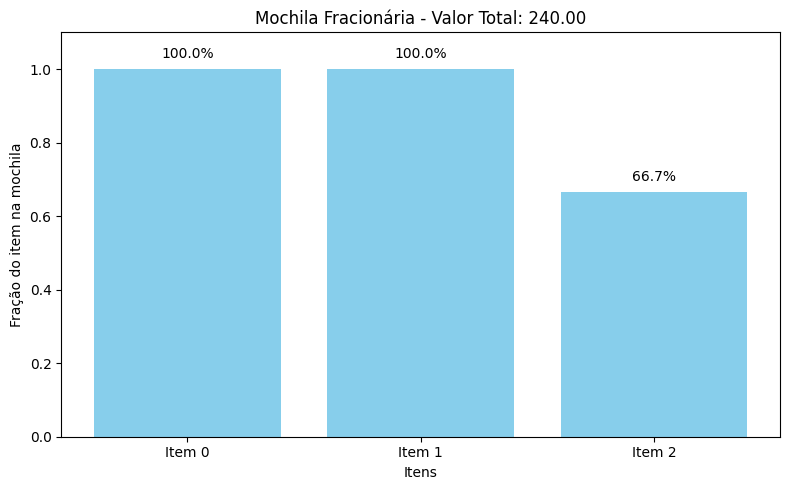

In [3]:
import matplotlib.pyplot as plt

def mochila_fracionaria(valores, pesos, capacidade):
    # Cria uma lista de itens com as informações: (valor_por_peso, valor, peso, índice)
    itens = []
    for indice in range(len(valores)):
        valor_peso = valores[indice] / pesos[indice]
        itens.append((valor_peso, valores[indice], pesos[indice], indice))
    
    # Ordena os itens pela razão valor/peso em ordem decrescente
    itens.sort(reverse=True)
    
    valor_total = 0.0
    capacidade_restante = capacidade
    fracoes_escolhidas = [0] * len(valores)
    
    for item in itens:
        valor_peso, valor, peso, idx = item
        if peso <= capacidade_restante:
            valor_total += valor
            fracoes_escolhidas[idx] = 1
            capacidade_restante -= peso
        else:
            fracao = capacidade_restante / peso
            valor_total += valor * fracao
            fracoes_escolhidas[idx] = fracao
            break  # mochila cheia
    
    return valor_total, fracoes_escolhidas

# Exemplo de uso
valores = [60, 100, 120]
pesos = [10, 20, 30]
capacidade = 50
resultado_valor, fracoes = mochila_fracionaria(valores, pesos, capacidade)

print("Valor máximo na mochila fracionária:", resultado_valor)
print("Frações dos itens escolhidas:", fracoes)

plt.figure(figsize=(8,5))
indices = range(len(valores))
plt.bar(indices, fracoes, tick_label=[f"Item {i}" for i in indices], color='skyblue')
plt.xlabel('Itens')
plt.ylabel('Fração do item na mochila')
plt.title(f'Mochila Fracionária - Valor Total: {resultado_valor:.2f}')
plt.ylim(0,1.1)
for i, fracao in enumerate(fracoes):
    plt.text(i, fracao+0.03, f"{fracao*100:.1f}%", ha='center')

plt.tight_layout()
plt.show()